In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats

#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
from __future__ import print_function
from IPython.display import Image

%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(os.getenv("PUIDATA"))

/home/cusp/uc288/PUIdata


### Reading the data
As requested, we need to read at least 2 months worth of data.

Reusing the getCitiBikeCSV function created by Professor Bianco, which does the following:
1. Checks if the file is already in the PUIDATA folder
2. If it's in the current directory, move it to the PUIDATA folder
3. If it's not present, then it will continue to download the data from the CitiBike repository and move the ZIP file into PUIDATA.
4. After downloading the ZIP file, it will be unzipped into the same location.
5. There's a special handling for 2014 data because of the difference in naming convention of the files.

In [3]:
# colder month
datestring = '201601'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df_jan = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df_jan.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [5]:
# warmer month
datestring = '201607'
getCitiBikeCSV(datestring)

file in place, you can continue


In [6]:
df_jul = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df_jul.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0


In [7]:
print(df_jan.size)
print(df_jul.size)

7642170
20701650


In [8]:
df = pd.concat([df_jan, df_jul])

In [9]:
print(df.size)

28343820


In [10]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [11]:
# removing columns not needed for both questions
df.drop(['stoptime', 'start station id', 'start station name', 'end station id', 
         'end station name', 'end station latitude', 'end station longitude', 
         'bikeid'], axis=1, inplace=True)
df.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,birth year,gender
0,923,1/1/2016 00:00:41,40.719105,-73.999733,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,40.743943,-73.979661,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,40.750664,-74.001768,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,40.719105,-73.999733,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,40.765909,-73.976342,Subscriber,1952.0,1


In [12]:
df['date'] = pd.to_datetime(df['starttime'])

In [13]:
df.drop(['starttime'], axis=1, inplace=True)
df.head()

,tripduration,start station latitude,start station longitude,usertype,birth year,gender,date
0,923,40.719105,-73.999733,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,40.743943,-73.979661,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,40.750664,-74.001768,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,40.719105,-73.999733,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,40.765909,-73.976342,Subscriber,1952.0,1,2016-01-01 00:01:12


# Trip Duration of bikers that ride during the day vs at night

Definitions:
* day: 06:00 AM - 05:59 PM
* night: 06:00 PM - 05:59 AM

## $H_0$: There is no statistical difference between the distributions of the trip duration of morning and night bikers

## $\alpha = 0.05$

In [14]:
def daynight(hour):
    '''
    Returns a flag to determine if the time is considered day or night
    - 1: if the hour of the day is between 6AM to 5PM
    - 0: if the hour of the day is between 6PM to 5AM
    
    Arguments:
    - hour: the hour of the day
    '''
    if 6 <= hour <= 17:
        return 1
    else:
        return 0

In [15]:
df['hour'] = df.date.dt.hour
df['daynight'] = df['hour'].apply(daynight)
df.head()

,tripduration,start station latitude,start station longitude,usertype,birth year,gender,date,hour,daynight
0,923,40.719105,-73.999733,Subscriber,1958.0,1,2016-01-01 00:00:41,0,0
1,379,40.743943,-73.979661,Subscriber,1969.0,1,2016-01-01 00:00:45,0,0
2,589,40.750664,-74.001768,Subscriber,1982.0,2,2016-01-01 00:00:48,0,0
3,889,40.719105,-73.999733,Subscriber,1961.0,2,2016-01-01 00:01:06,0,0
4,1480,40.765909,-73.976342,Subscriber,1952.0,1,2016-01-01 00:01:12,0,0


In [16]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station latitude,start station longitude,birth year,gender,hour,daynight
count,1.889588e+06,1.889588e+06,1.889588e+06,1.661448e+06,1.889588e+06,1.889588e+06,1.889588e+06
mean,9.590442e+02,4.073740e+01,-7.398689e+01,1.977564e+03,1.089524e+00,1.391510e+01,6.914200e-01
std,1.235051e+04,2.249149e-02,1.613718e-02,1.164123e+01,5.722401e-01,4.925261e+00,4.619074e-01
min,6.100000e+01,4.064668e+01,-7.402545e+01,1.885000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.790000e+02,4.072110e+01,-7.399810e+01,NaN,1.000000e+00,1.000000e+01,0.000000e+00
50%,6.250000e+02,4.073827e+01,-7.398864e+01,NaN,1.000000e+00,1.400000e+01,1.000000e+00
75%,1.061000e+03,4.075300e+01,-7.397771e+01,NaN,1.000000e+00,1.800000e+01,1.000000e+00
max,6.707533e+06,4.078721e+01,-7.392850e+01,2.000000e+03,2.000000e+00,2.300000e+01,1.000000e+00


In [17]:
df.size

17006292

*Skipping the extra credit for doing the KS test from scratch for now*

In [18]:
day_duration = df[df['daynight']==1].tripduration
day_duration.size

1306499

In [19]:
night_duration = df[df['daynight']==0].tripduration
night_duration.size

583089

**Note: As per the scipy documentation**

*ks_2samp - This is a two-sided test for the null hypothesis that **2 independent samples are drawn from the same continuous distribution**.*

In [79]:
ks = scipy.stats.ks_2samp(day_duration, night_duration)
print(ks)

Ks_2sampResult(statistic=0.0078040355143450535, pvalue=9.2462402973751894e-22)


## Explain the return value of the KS 2-sample test
Since the KS 2-sample test's null hypothesis is that the 2 samples are the same, and that specific null hypothesis can only be rejected if the statistic is greater than the value of $c(\alpha)$.

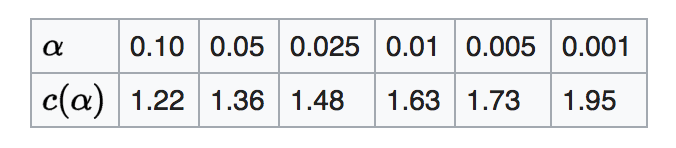

In [86]:
Image(filename='./screenshots/ks-2sample.png')

Since $0.0078 < 1.36$, we cannot reject the null hypothesis of the scipy.stats.ks_2samp that the 2 distributions are the same.

Which in turn means, our $H_0$ that **there is no statistical difference between the distributions of morning and night bikers** CAN BE REJECTED!!

### Sampling the data and sorting it for Pearson's Test and Spearman's Test for Correlation

In [22]:
day_200 = np.random.choice(day_duration, size=200, replace=False)
day_200.sort()
day_200

array([ 135,  156,  166,  169,  176,  177,  180,  184,  185,  189,  193,
        228,  231,  245,  254,  268,  270,  271,  274,  278,  283,  292,
        292,  295,  297,  302,  302,  304,  308,  309,  311,  312,  327,
        334,  339,  345,  346,  365,  384,  386,  390,  392,  396,  401,
        403,  412,  416,  421,  424,  426,  427,  427,  436,  445,  445,
        451,  456,  457,  460,  466,  470,  474,  474,  481,  483,  486,
        492,  493,  494,  496,  511,  512,  514,  514,  515,  532,  532,
        533,  534,  543,  552,  555,  559,  571,  583,  587,  607,  617,
        617,  620,  620,  624,  633,  635,  654,  654,  660,  668,  675,
        675,  676,  679,  681,  685,  692,  696,  702,  706,  709,  711,
        714,  733,  735,  738,  738,  761,  765,  776,  780,  798,  802,
        802,  806,  824,  825,  829,  832,  843,  849,  852,  861,  877,
        879,  879,  898,  910,  911,  950,  956,  956,  960, 1028, 1041,
       1042, 1052, 1056, 1063, 1097, 1102, 1105, 11

In [23]:
night_200 = np.random.choice(night_duration, size=200, replace=False)
night_200.sort()
night_200

array([ 128,  131,  141,  144,  158,  163,  206,  208,  209,  211,  213,
        213,  219,  230,  236,  240,  243,  243,  247,  251,  254,  255,
        257,  262,  264,  275,  283,  287,  292,  293,  299,  300,  306,
        315,  319,  320,  320,  326,  328,  336,  341,  347,  363,  373,
        380,  386,  386,  393,  406,  406,  409,  412,  414,  419,  419,
        421,  426,  427,  430,  432,  437,  440,  441,  443,  446,  448,
        450,  454,  460,  463,  464,  468,  469,  471,  480,  486,  495,
        500,  512,  515,  516,  520,  521,  523,  525,  525,  526,  526,
        527,  531,  535,  544,  549,  554,  556,  561,  563,  574,  574,
        578,  581,  584,  587,  590,  603,  605,  608,  611,  612,  620,
        626,  627,  632,  641,  648,  655,  669,  672,  676,  690,  693,
        699,  702,  702,  713,  721,  735,  740,  742,  744,  749,  762,
        762,  769,  775,  781,  785,  812,  827,  836,  861,  864,  874,
        888,  897,  904,  908,  911,  932,  942,  9

In [24]:
pearson = scipy.stats.pearsonr(day_200, night_200)
print(pearson)

(0.98519516993983225, 1.2939816807754532e-153)


## Explain the return value of the Pearson's Test for Correlation

As per the scipy documentation for [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr)

> The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

It says that the p-value returned is the probability that it is not correlated. In this case, the p-value returned is smaller than the significance level $\alpha$, 0.05, meaning **we can reject the $H_0$ that there is no significant correlation between the two distributions.**

In [25]:
spearman = scipy.stats.spearmanr(day_200, night_200)
print(spearman)

SpearmanrResult(correlation=0.99998949963293249, pvalue=0.0)


## Explain the return value of the Spearman's Test for Correlation
As per the scipy documentation for [scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr)

> The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

It says that the p-value returned is the probability that it is not correlated. In this case, the p-value returned is smaller than the significance level $\alpha$, 0.05, meaning **we can reject the $H_0$ that there is no significant correlation between the two distribitions.**

# Age of bikers for trips originating from Manhattan and Brooklyn

## $H_0$: There is no statistical difference between the distributions of the age riders of Manhattan and Brooklyn originating rides

## $\alpha = 0.05$

In [87]:
# late import
import json
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
    

url = 'http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nybb/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson'
try:
   response = urllib.urlopen(url)
   data = response.read().decode('utf-8')
   data = json.loads(data)
except urllib.HTTPError:
    print('Invalid URL!!!')

In [88]:
data['features'][0]['properties']

{'BoroCode': 3,
 'BoroName': 'Brooklyn',
 'OBJECTID': 1,
 'Shape__Area': 0.019163176863698,
 'Shape__Length': 2.36391194216966}

In [89]:
brooklyn = data['features'][0]

In [90]:
data['features'][3]['properties']

{'BoroCode': 1,
 'BoroName': 'Manhattan',
 'OBJECTID': 4,
 'Shape__Area': 0.00630741395487552,
 'Shape__Length': 1.12521485268175}

In [91]:
manhattan = data['features'][3]

In [92]:
# Reference for getting the min max lat of the boroughs
# https://gis.stackexchange.com/questions/90553/fiona-get-each-feature-extent-bounds

def explode(coords):
    """Explode a GeoJSON geometry's coordinates object and yield coordinate tuples.
    As long as the input is conforming, the type of the geometry doesn't matter."""
    for e in coords:
        if isinstance(e, (float, int, long)):
            yield coords
            break
        else:
            for f in explode(e):
                yield f

def bbox(f):
    x, y = zip(*list(explode(f['geometry']['coordinates'])))
    return min(x), min(y), max(x), max(y)

In [93]:
bbox(brooklyn)

(-74.0418978864012, 40.5695382235533, -73.8335606267475, 40.7391362164936)

In [94]:
bbox(manhattan)

(-74.0477310881111, 40.68292519539, -73.9066524219675, 40.8790463395808)

In [95]:
def getBorough(row):
    b_minlong = -74.0418978864012
    b_minlat = 40.5695382235533
    b_maxlong = -73.8335606267475
    b_maxlat = 40.7391362164936
    
    m_minlong = -74.0477310881111
    m_minlat = 40.68292519539
    m_maxlong = -73.9066524219675
    m_maxlat = 40.8790463395808
    
    if (b_minlat <= row['start station latitude'] <= b_maxlat) &(b_minlong <= row['start station longitude'] <= b_maxlong):
        return 'Brooklyn'
    elif (m_minlat <= row['start station latitude'] <= m_maxlat) &(m_minlong <= row['start station longitude'] <= m_maxlong):
        return 'Manhattan'
    else:
        return 'Other'

In [96]:
df['borough'] = df.apply(getBorough, axis=1)

In [97]:
df['age'] = 2017 - df['birth year']

In [98]:
df['age'].dropna(inplace= True)

In [99]:
df.size

20785468

In [100]:
df[df['usertype'] != 'Subscriber'].head()

,tripduration,start station latitude,start station longitude,usertype,birth year,gender,date,hour,daynight,borough,age
19,858,40.710451,-73.960876,Customer,NaN,0,2016-01-01 00:09:31,0,0,Brooklyn,NaN
20,839,40.710451,-73.960876,Customer,NaN,0,2016-01-01 00:09:55,0,0,Brooklyn,NaN
22,110,40.726281,-73.989780,Customer,NaN,0,2016-01-01 00:10:24,0,0,Brooklyn,NaN
26,2023,40.776829,-73.963888,Customer,NaN,0,2016-01-01 00:11:15,0,0,Manhattan,NaN
28,1236,40.767801,-73.965921,Customer,NaN,0,2016-01-01 00:12:14,0,0,Manhattan,NaN


In [101]:
brooklyn_riders = df[df['borough']=='Brooklyn'].age
brooklyn_riders = brooklyn_riders.dropna()

In [102]:
manhattan_riders = df[df['borough']=='Manhattan'].age
manhattan_riders = manhattan_riders.dropna()

In [103]:
print(manhattan_riders.size, brooklyn_riders.size)

807811 853637


## KS Test

In [104]:
ks_age = scipy.stats.ks_2samp(brooklyn_riders, manhattan_riders)
print(ks_age)

Ks_2sampResult(statistic=0.081896402402308666, pvalue=0.0)


### Explanation:
Similar to the explanation above, we cannot reject the null hypothesis of the ks_2samp test by the scipy package because the statistic is smaller than the value 1.36 and the p-value is actually 0%!

Therefore, we can reject the null hypothesis that there is no statistical difference between the distributions.

In [105]:
brooklyn_200 = np.random.choice(brooklyn_riders, size=200, replace=False)
brooklyn_200.sort()
brooklyn_200

array([ 20.,  21.,  21.,  21.,  21.,  22.,  22.,  22.,  22.,  23.,  23.,
        23.,  24.,  24.,  24.,  25.,  25.,  25.,  26.,  26.,  26.,  26.,
        26.,  27.,  27.,  27.,  27.,  27.,  27.,  27.,  27.,  27.,  27.,
        27.,  28.,  28.,  28.,  28.,  29.,  29.,  29.,  29.,  29.,  29.,
        29.,  29.,  29.,  29.,  29.,  29.,  30.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,
        32.,  32.,  32.,  32.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,
        33.,  33.,  33.,  33.,  33.,  33.,  34.,  34.,  34.,  34.,  34.,
        35.,  35.,  35.,  35.,  35.,  35.,  35.,  36.,  36.,  36.,  36.,
        36.,  36.,  36.,  36.,  37.,  37.,  37.,  37.,  37.,  37.,  37.,
        37.,  37.,  38.,  38.,  38.,  38.,  38.,  39.,  40.,  40.,  40.,
        40.,  40.,  40.,  41.,  41.,  41.,  41.,  41.,  42.,  42.,  43.,
        43.,  44.,  44.,  44.,  44.,  44.,  45.,  46.,  46.,  46.,  47.,
        47.,  47.,  48.,  48.,  48.,  48.,  48.,  4

In [106]:
manhattan_200 = np.random.choice(manhattan_riders, size=200, replace=False)
manhattan_200.sort()
manhattan_200

array([ 18.,  21.,  22.,  23.,  24.,  24.,  24.,  24.,  25.,  25.,  25.,
        25.,  25.,  25.,  26.,  26.,  26.,  26.,  26.,  27.,  27.,  27.,
        27.,  27.,  28.,  28.,  28.,  29.,  29.,  29.,  29.,  29.,  29.,
        29.,  29.,  29.,  29.,  29.,  30.,  30.,  30.,  30.,  30.,  30.,
        30.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  33.,  33.,  33.,
        33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,  34.,  34.,  34.,
        34.,  34.,  34.,  34.,  34.,  34.,  34.,  34.,  35.,  35.,  35.,
        35.,  35.,  35.,  35.,  35.,  35.,  35.,  36.,  36.,  36.,  36.,
        36.,  36.,  36.,  36.,  37.,  37.,  37.,  37.,  38.,  38.,  38.,
        38.,  38.,  38.,  39.,  40.,  40.,  40.,  40.,  40.,  41.,  41.,
        42.,  42.,  42.,  42.,  42.,  42.,  43.,  43.,  43.,  43.,  43.,
        43.,  43.,  43.,  43.,  44.,  44.,  44.,  44.,  45.,  45.,  45.,
        45.,  46.,  47.,  47.,  47.,  47.,  47.,  4

## Pearson's Test for Correlation

In [107]:
pearson_age = scipy.stats.pearsonr(brooklyn_200, manhattan_200)
print(pearson_age)

(0.99492989521386899, 1.7569412942089344e-199)


## Explanation:
The correlation coefficient is very close to 1, which means that these 2 distributions are highly correlated and the p-value that they are not correlated is very very small.

Therefore, we can confidently reject the null hypothesis that there is no statistical difference between the two distributions.

## Spearman's Test for Correlation

In [108]:
spearman_age = scipy.stats.spearmanr(brooklyn_200, manhattan_200)
print(spearman_age)

SpearmanrResult(correlation=0.99863359201013191, pvalue=8.8856859710038847e-256)


## Explanation:
Similarly to the Pearson's test, the correlation coefficient of this Spearman's test is also very close to 1, which means that these 2 distributions are highly correlated and the p-value that they are not correlated is even smaller.

Therefore, we can confidently reject the null hypothesis that there is no statistical difference between the two distributions.